<a href="https://colab.research.google.com/github/MarkystarkDotCO/keras_tuner/blob/main/KerasTuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.5 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import keras_tuner
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.__version__

'2.14.0'

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

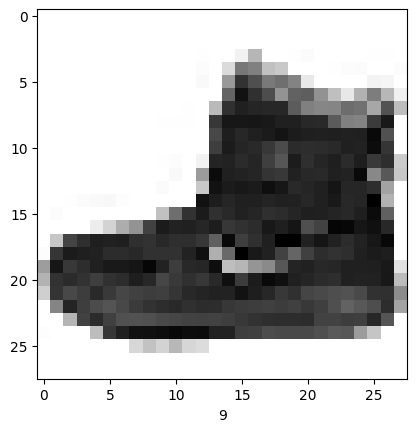

In [7]:
plt.imshow(x_train[0], cmap='binary')
plt.xlabel(y_train[0])
plt.show()

In [17]:
def build_model(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

In [18]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [20]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 3 Complete [00h 00m 29s]
val_loss: 21.70439910888672

Best val_loss So Far: 8.376161575317383
Total elapsed time: 00h 01m 36s
